In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df=pd.read_csv("loan_train.csv")
df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male


In [2]:
df=df.iloc[:, 2:]
df['loan_status']=df.loan_status.apply(lambda x: 1 if(x == 'PAIDOFF') else 0)

In [3]:
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=df['effective_date'].dt.dayofweek
df['due_date']=df['due_date'].dt.dayofweek
df.head(3)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,3,4,45,High School or Below,male
1,1,1000,30,3,4,33,Bechalor,female
2,1,1000,15,3,3,27,college,male


In [4]:
X=df.copy()
y=df['loan_status'].values

In [5]:
X.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,3,4,45,High School or Below,male
1,1,1000,30,3,4,33,Bechalor,female
2,1,1000,15,3,3,27,college,male
3,1,1000,30,4,5,28,college,female
4,1,1000,30,4,5,29,college,male


In [6]:
X['Gender']=X.Gender.apply(lambda x: 1 if(x == 'male') else 0)
X.head(3)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,3,4,45,High School or Below,1
1,1,1000,30,3,4,33,Bechalor,0
2,1,1000,15,3,3,27,college,1


In [7]:
education_dummy=pd.get_dummies(df['education'], drop_first=False)
X=pd.concat([X, education_dummy], axis=1)
X.head(3)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,Master or Above,college
0,1,1000,30,3,4,45,High School or Below,1,0,1,0,0
1,1,1000,30,3,4,33,Bechalor,0,1,0,0,0
2,1,1000,15,3,3,27,college,1,0,0,0,1


In [8]:
X=X.drop(['education', 'loan_status'], axis=1)
X.head()

,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,3,4,45,1,0,1,0,0
1,1000,30,3,4,33,0,1,0,0,0
2,1000,15,3,3,27,1,0,0,0,1
3,1000,30,4,5,28,0,0,0,0,1
4,1000,30,4,5,29,1,0,0,0,1


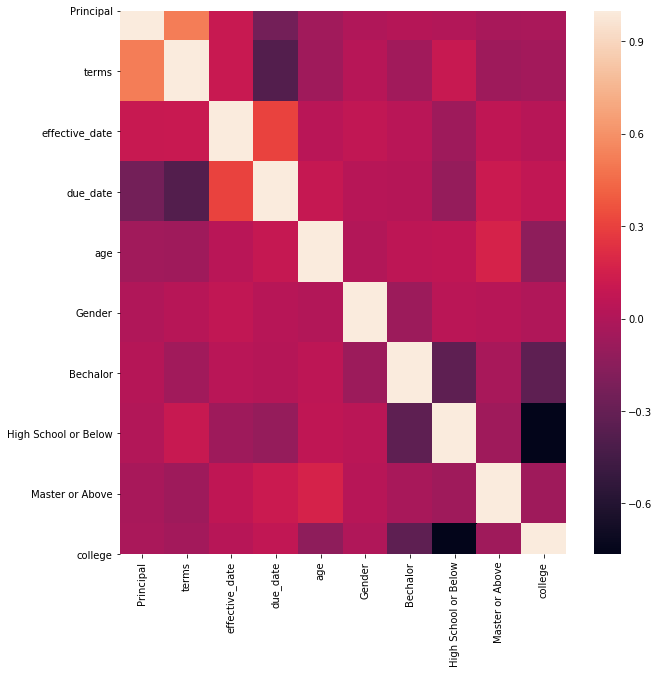

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr())

In [10]:
X.shape

(346, 10)

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()
X=sc.fit(X).transform(X)

In [12]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

X_res, y_res=SMOTETomek().fit_sample(X, y) ##Over-Sampling Dataset
print("Original DATASET Shape: {}".format(len(X)))
print("Resultant Dataset Shape: {}".format(len(X_res)))

Using TensorFlow backend.


Original DATASET Shape: 346
Resultant Dataset Shape: 500


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(max_depth=18, n_estimators=200)
rfm

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rfm.fit(X_train, y_train)
rfm.score(X_test, y_test)

0.8

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.76

In [18]:
scores=[]
ranges=np.arange(1, 50)

for i in ranges:
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

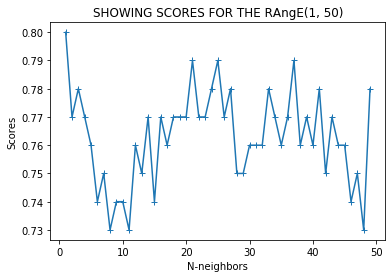

In [19]:
plt.plot(ranges, scores, marker='+')
plt.xlabel("N-neighbors")
plt.ylabel("Scores")
plt.title("SHOWING SCORES FOR THE RAngE(1, 50)")
plt.show()

In [20]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.77

In [21]:
test_df=pd.read_csv("loan_test.csv")
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [22]:
test_df=test_df.iloc[:, 2:]
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])
test_df['due_date']=pd.to_datetime(test_df['due_date'])

test_df['due_date']=test_df['due_date'].dt.dayofweek
test_df['effective_date']=test_df['effective_date'].dt.dayofweek
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,3,4,50,Bechalor,female
1,PAIDOFF,300,7,4,3,35,Master or Above,male
2,PAIDOFF,1000,30,5,6,43,High School or Below,female
3,PAIDOFF,1000,30,5,6,26,college,male
4,PAIDOFF,800,15,6,6,29,Bechalor,male


In [23]:
y=test_df['loan_status'].apply(lambda x: 1 if(x == 'PAIDOFF') else 0)
test_df=test_df.drop(['loan_status'], axis=1)
education_dummy=pd.get_dummies(test_df['education'], drop_first=False)
X=pd.concat([test_df, education_dummy], axis=1)
X.head(3)

,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,3,4,50,Bechalor,female,1,0,0,0
1,300,7,4,3,35,Master or Above,male,0,0,1,0
2,1000,30,5,6,43,High School or Below,female,0,1,0,0


In [24]:
X['Gender']=X['Gender'].apply(lambda x: 1 if(x == 'male') else 0)
X=X.drop(['education'], axis=1)
X.head()

,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,3,4,50,0,1,0,0,0
1,300,7,4,3,35,1,0,0,1,0
2,1000,30,5,6,43,0,0,1,0,0
3,1000,30,5,6,26,1,0,0,0,1
4,800,15,6,6,29,1,1,0,0,0


In [25]:
X.shape

(54, 10)

In [26]:
X=StandardScaler().fit_transform(X)

In [27]:
X[:2]

array([[ 0.49362588,  0.92844966, -0.28674019,  0.298162  ,  3.05981865,
        -1.97714211,  2.39791576, -0.79772404, -0.19611614, -0.86135677],
       [-3.56269116, -1.70427745,  0.10035907, -0.11467769,  0.53336288,
         0.50578054, -0.41702883, -0.79772404,  5.09901951, -0.86135677]])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
y_pred=rfm.predict(X)
print("FOR RANDOM FOREST MODEL ::: \n")
print("ACCURACY SCORE: {}%\n\n".format(np.round(accuracy_score(y_pred, y)*100), 4))
print("CLASSIFICATION REPORT: {}\n\n".format(classification_report(y_pred, y)))
print("CONFUSION MATRIX: {}\n".format(confusion_matrix(y_pred, y)))

FOR RANDOM FOREST MODEL ::: 

ACCURACY SCORE: 67.0%


CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.64      0.41      0.50        22
           1       0.68      0.84      0.75        32

    accuracy                           0.67        54
   macro avg       0.66      0.63      0.62        54
weighted avg       0.66      0.67      0.65        54



CONFUSION MATRIX: [[ 9 13]
 [ 5 27]]



In [30]:
y_pred=knn.predict(X)
print("FOR KNN MODEL ::: \n")
print("ACCURACY SCORE: {}%\n\n".format(np.round(accuracy_score(y_pred, y)*100), 4))
print("CLASSIFICATION REPORT: {}\n\n".format(classification_report(y_pred, y)))
print("CONFUSION MATRIX: {}\n".format(confusion_matrix(y_pred, y)))

FOR KNN MODEL ::: 

ACCURACY SCORE: 59.0%


CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.64      0.35      0.45        26
           1       0.57      0.82      0.68        28

    accuracy                           0.59        54
   macro avg       0.61      0.58      0.56        54
weighted avg       0.61      0.59      0.57        54



CONFUSION MATRIX: [[ 9 17]
 [ 5 23]]

